In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [33]:
%run api_binancePrice.ipynb
# import binancePrice

1     object
2     object
3     object
4     object
5     object
6      int64
7     object
8      int64
9     object
10    object
dtype: object


In [34]:
df = pd.read_csv('binance_ETHEUR.csv')

In [35]:
df['datetime'] = pd.to_datetime(df.datetime,format='%Y-%m-%d %H:%M:%S')
df.index = df['datetime']

In [37]:
df.tail()

,datetime,open,high,low,close,volume,close_time,asset_volume,trade_number,taker_buy_base,taker_buy_quote
datetime,,,,,,,,,,,
2020-10-08 14:00:00,2020-10-08 14:00:00,288.51,291.10,288.03,291.10,36.82582,1602161999999,10677.640454,88,33.02291,9576.258429
2020-10-08 15:00:00,2020-10-08 15:00:00,291.10,294.48,290.73,294.31,179.10913,1602165599999,52493.541486,227,138.04180,40428.117818
2020-10-08 16:00:00,2020-10-08 16:00:00,294.48,298.70,292.95,298.70,217.11933,1602169199999,64199.209964,338,168.18394,49737.617948
2020-10-08 17:00:00,2020-10-08 17:00:00,298.75,299.00,297.23,298.00,97.35085,1602172799999,29048.374632,148,76.70305,22893.253386
2020-10-08 18:00:00,2020-10-08 18:00:00,298.00,300.00,298.00,298.45,186.68414,1602176399999,55827.581635,98,180.67834,54033.380418


In [38]:
df.shape

(500, 11)

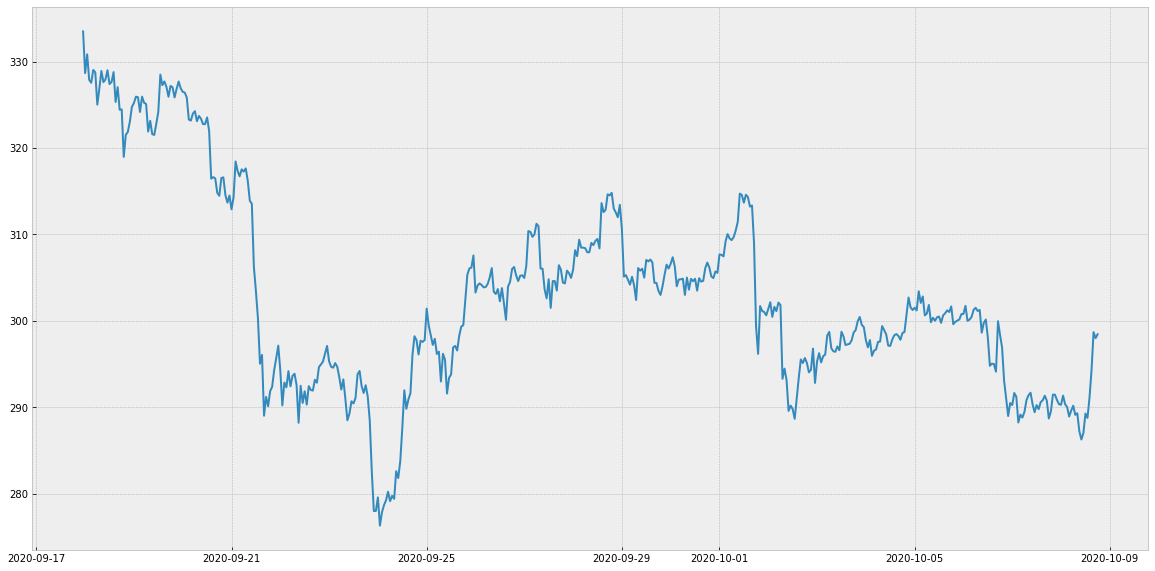

In [39]:

plt.plot(df['close'])

# Creating moving average prediction

In [69]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['datetime','close'])

In [70]:
new_data.columns

Index(['datetime', 'close'], dtype='object')

In [71]:
for i in range(0,len(new_data)):
    new_data['datetime'][i] = df['datetime'][i]
    new_data['close'][i] = df['close'][i]
new_data['datetime'] = pd.to_datetime(df.datetime,format='%Y-%m-%d %H:%M:%S')

new_data.index = df['datetime']

In [72]:
new_data.drop('datetime',1, inplace=True)

In [73]:
train = new_data[:400]
valid = new_data[400:]

In [74]:
predictions = []
for i in range(0,valid.shape[0]):
    a = train['close'][len(train)-100+i:].sum() + sum(predictions)
    b = a/100
    predictions.append(b)

In [75]:
valid['Predictions'] = predictions

E:\AnacondA\envs\matrixai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


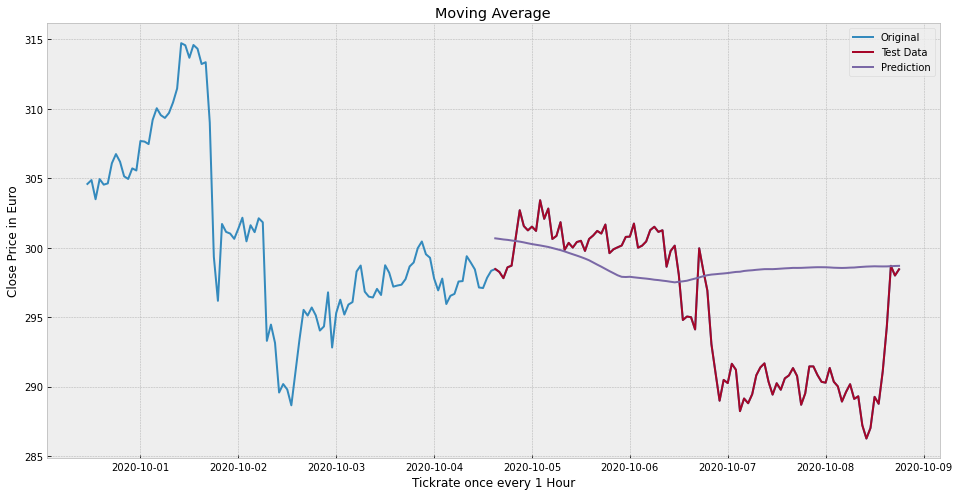

In [77]:
plt.style.use('bmh')
plt.figure(figsize=(16,8))
plt.title('Moving Average')
plt.plot(df['close'][300:])
plt.plot(valid[['close','Predictions']])
plt.legend(['Original','Test Data','Prediction'])
plt.xlabel('Tickrate once every 1 Hour')
plt.ylabel('Close Price in Euro')
plt.show()